Informasi data https://www.kaggle.com/datasets/shikhnu/gold-price

BUSINESS UNDERSTANDING

Permasalahan harga emas yang selalu mengalami perubahan karena kurs dollar yang terus bergerak naik maupun turun membuat nilai mata uang rupiah menjadi ikut tidak stabil juga. Tujuan bisnis ini dibuat untuk mendapatkan estimasi harga emas dalam USD dan Rupiah agar pembeli tidak kesulitan dalam mengetahui harga emas, dan penjual supaya tidak mengalami kerugian.

DATA UNDERSTANDING

    Date : Tanggal 
    Open : Harga pembukaan adalah harga pertama kali transaksi dilakukan pada hari itu
    High : Harga tertinggi yang pernah terjadi dalam suatu periode
    Low  : Harga terendah yang pernah terjadi dalam suatu periode
    Chg  : Menunujukkan presentase perubahan harga dari posisi Open-Close




# Deskripsi library yang digunakan

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memanggi Dataset

In [18]:
df = pd.read_csv('GoldPrice.csv')

# Deskripsi Dataset

In [19]:
df.head()

,Date,Price,Open,High,Low,Chg%
Sep 11,2020,1957.35,1952.55,1963.3,1944.35,-0.0035
Sep 10,2020,1964.30,1955.30,1975.2,1948.60,0.0048
Sep 09,2020,1954.90,1939.40,1959.7,1926.30,0.0060
Sep 08,2020,1943.20,1938.00,1948.3,1911.70,0.0031
Sep 07,2020,1937.10,1940.70,1947.4,1930.45,-0.0018


# Data Preparation

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2531 entries, Sep 11 to Jan 03
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2531 non-null   int64  
 1   Price   2531 non-null   float64
 2   Open    2531 non-null   float64
 3   High    2531 non-null   float64
 4   Low     2531 non-null   float64
 5   Chg%    2531 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 138.4+ KB


<Axes: >

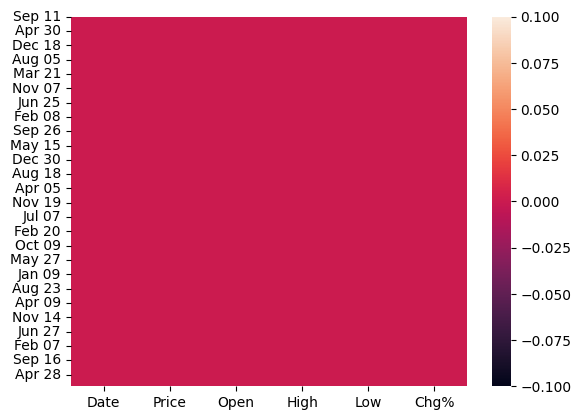

In [21]:
sns.heatmap(df.isnull())

In [22]:
df.describe()

,Date,Price,Open,High,Low,Chg%
count,2531.000000,2531.000000,2531.000000,2531.000000,2531.000000,2531.000000
mean,2015.411695,1428.516148,1421.804058,1426.688119,1416.290885,0.000254
std,2.795325,179.401005,183.482977,187.313509,179.204684,0.016016
min,2011.000000,1070.800000,1070.100000,1074.200000,1069.200000,-0.111300
25%,2013.000000,1300.200000,1291.350000,1293.885000,1288.300000,-0.004700
50%,2015.000000,1370.300000,1360.500000,1362.300000,1359.300000,0.000100
75%,2018.000000,1551.200000,1552.000000,1561.350000,1541.150000,0.005300
max,2020.000000,2069.400000,2076.400000,2089.200000,2049.000000,0.127100


# Visualisasi Data

<Axes: >

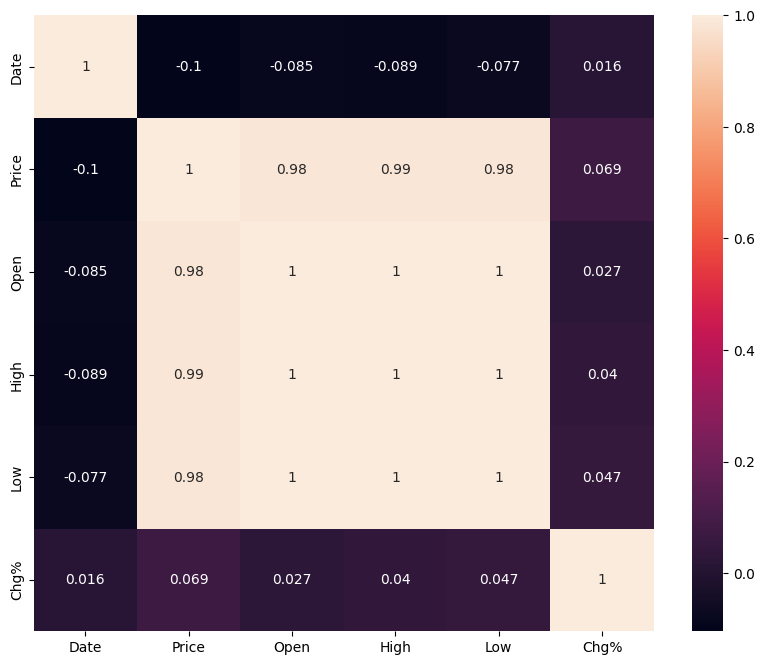

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

#  Harga Pembukaan Emas Berdasarkan Harga Emas Tertinggi

In [49]:
High = df.groupby('High').count()[['Open']].sort_values(by='Open',ascending=True).reset_index()
High = High.rename(columns={'Open':'numberOfgoldprice'})

(array([   0,    1,    2, ..., 2005, 2006, 2007]),
 [Text(0, 0, '1074.2'),
  Text(1, 0, '1090.8'),
  Text(2, 0, '1093.3'),
  Text(3, 0, '1108.1'),
  Text(4, 0, '1112.4'),
  Text(5, 0, '1114.5'),
  Text(6, 0, '1119.8'),
  Text(7, 0, '1120.6'),
  Text(8, 0, '1120.8'),
  Text(9, 0, '1121.0'),
  Text(10, 0, '1121.4'),
  Text(11, 0, '1122.0'),
  Text(12, 0, '1123.0'),
  Text(13, 0, '1123.1'),
  Text(14, 0, '1123.3'),
  Text(15, 0, '1123.9'),
  Text(16, 0, '1124.0'),
  Text(17, 0, '1124.7'),
  Text(18, 0, '1126.9'),
  Text(19, 0, '1128.1'),
  Text(20, 0, '1128.2'),
  Text(21, 0, '1128.4'),
  Text(22, 0, '1128.6'),
  Text(23, 0, '1130.3'),
  Text(24, 0, '1131.6'),
  Text(25, 0, '1133.8'),
  Text(26, 0, '1134.0'),
  Text(27, 0, '1134.3'),
  Text(28, 0, '1134.9'),
  Text(29, 0, '1135.0'),
  Text(30, 0, '1135.2'),
  Text(31, 0, '1135.3'),
  Text(32, 0, '1135.5'),
  Text(33, 0, '1135.8'),
  Text(34, 0, '1135.9'),
  Text(35, 0, '1136.05'),
  Text(36, 0, '1137.1'),
  Text(37, 0, '1137.4'),
  Text(3

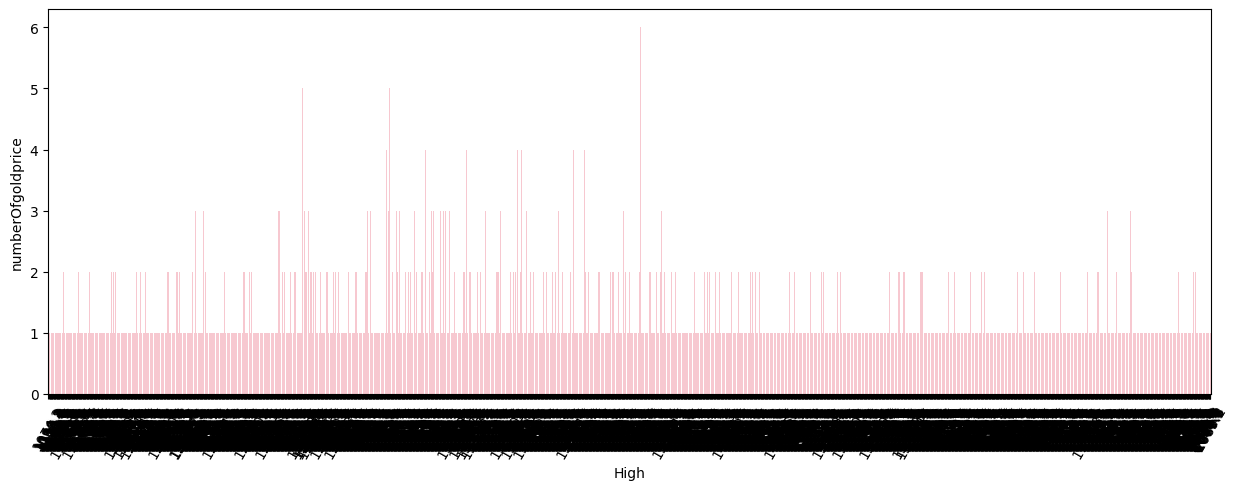

In [50]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=High['High'], y=High['numberOfgoldprice'], color='pink')
plt.xticks(rotation=60)

#

# Harga Terendah 

In [44]:
Low = df.groupby('Low').count()[['Open']].sort_values(by='Open').reset_index()
Low = Low.rename(columns={'Open':'count'})

<Axes: xlabel='Low', ylabel='count'>

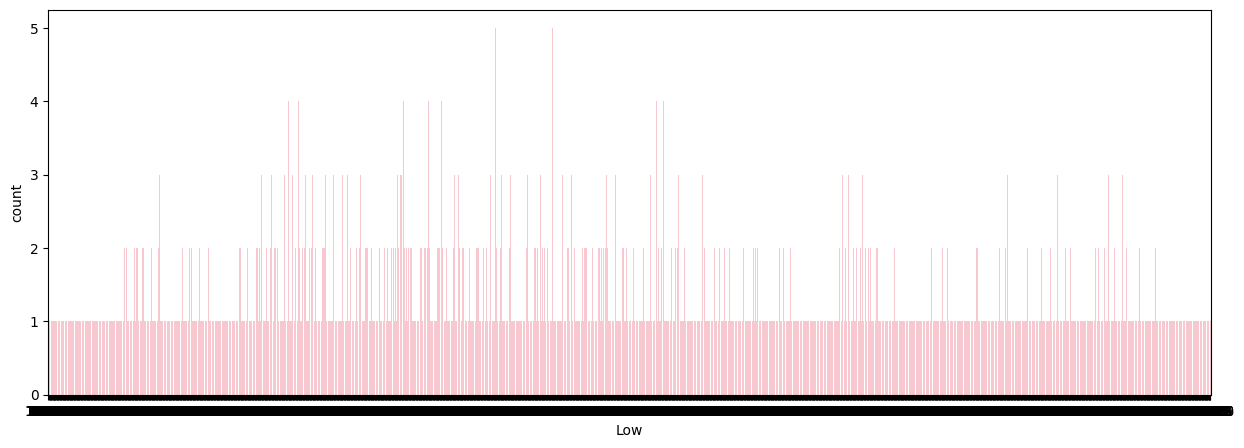

In [46]:
plt.figure(figsize=(15,5))
sns.barplot(x=Low['Low'], y=Low['count'], color='pink')

# Distribusi Open 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20680\1380803012.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Open'])


<Axes: xlabel='Open', ylabel='Density'>

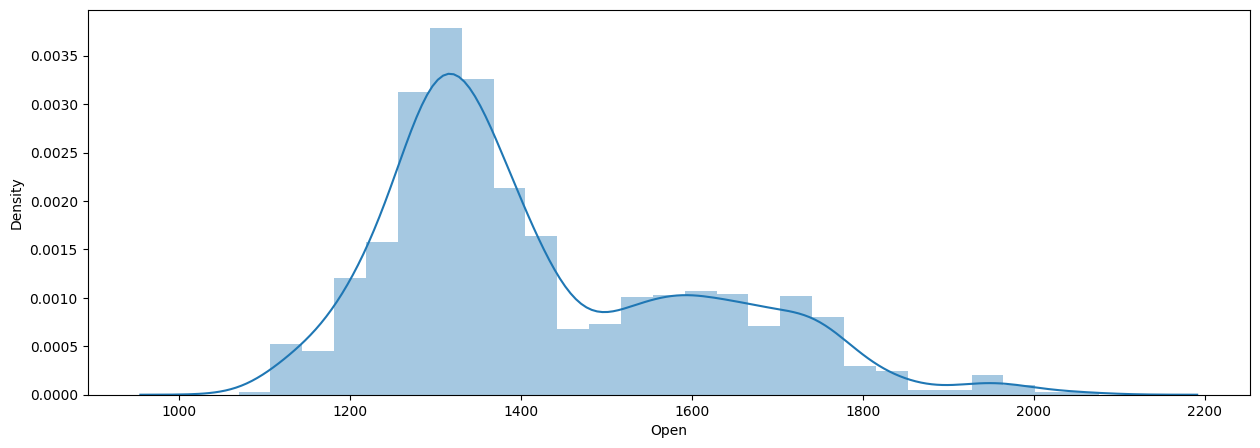

In [28]:
plt.figure(figsize=(15,5))
sns.distplot(df['Open'])

# Distribusi Harga Emas

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20680\1954555324.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

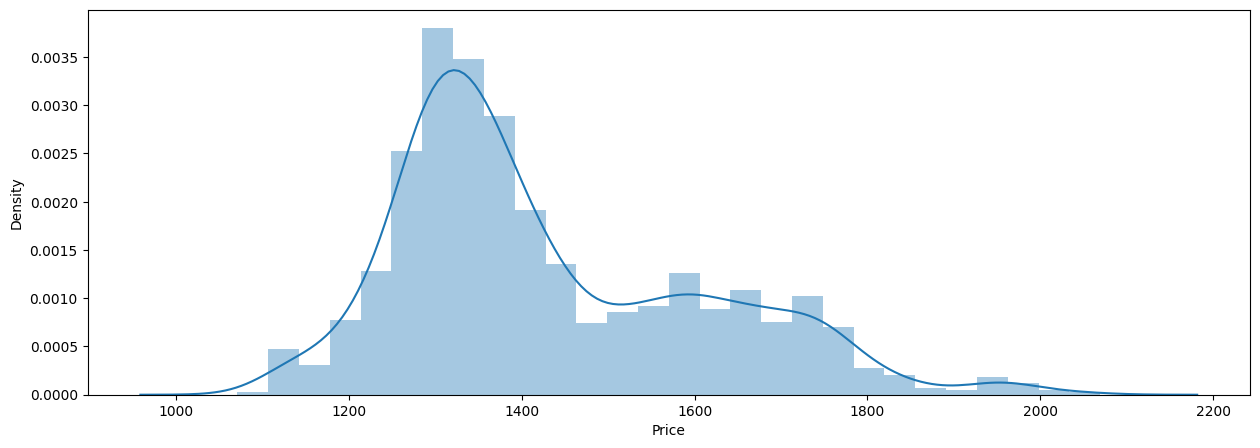

In [29]:
plt.figure(figsize=(15,5))
sns.distplot(df['Price'])

# MODELING

# Seleksi Fitur

In [30]:
features = ['Open','High','Low','Date','Chg%']
x = df[features]
y = df['Price']
x.shape, y.shape

((2531, 5), (2531,))

# Split data training dan data testing

In [31]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(633,)

# Membuat Model Regresi Linier

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [33]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.9762303117901406


# Membuat Inputan Model Regresi Linier

In [54]:
#Date=2020, Open=1599.5, High=1601.5, Low =1594.2, Chg=0.0036
input_data = np.array([[2020, 1599.5,1601.5,1594.2,0.0036]])

prediction = lr.predict(input_data)
print('Estimasi harga emas dalam Rupiah :', prediction)

Estimasi harga emas dalam Rupiah : [1892.99201611]


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# DEPLOYMENT

# Save Model

In [ ]:
import pickle

filename = 'estimasi_goldprice.sav'
pickle.dump(lr,open(filename,'wb'))